In [15]:
import seaborn as sns
import numpy as np
df = sns.load_dataset('flights')

In [17]:
df['diff'] = df['passengers'].diff()
df['log_diff'] = np.log(df['passengers']).diff()
df['monthly_mean'] = df.groupby('month')['log_diff'].transform('mean') # Just mean gives you len = 12

df['ds'] = df['log_diff'] - df['monthly_mean']

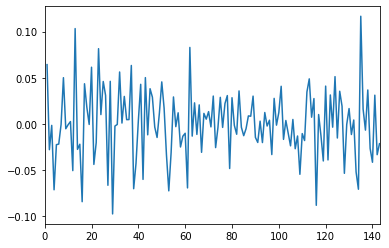

In [18]:
df['ds'].plot()

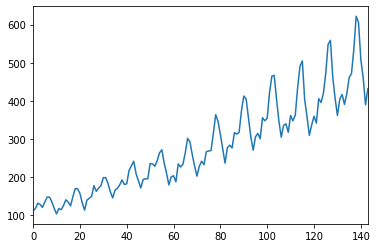

In [2]:
df['passengers'].plot()

In [19]:
train = df.iloc[1:120]

### Attempt1: Last Value

In [20]:
fc1 = [train['ds'].iloc[-1]] * 24
fc1

[-0.04042316749156678,
 -0.04042316749156678,
 -0.04042316749156678,
 -0.04042316749156678,
 -0.04042316749156678,
 -0.04042316749156678,
 -0.04042316749156678,
 -0.04042316749156678,
 -0.04042316749156678,
 -0.04042316749156678,
 -0.04042316749156678,
 -0.04042316749156678,
 -0.04042316749156678,
 -0.04042316749156678,
 -0.04042316749156678,
 -0.04042316749156678,
 -0.04042316749156678,
 -0.04042316749156678,
 -0.04042316749156678,
 -0.04042316749156678,
 -0.04042316749156678,
 -0.04042316749156678,
 -0.04042316749156678,
 -0.04042316749156678]

### Attempt2: Mean 

In [21]:
fc2 = [train['ds'].mean()]*24
fc2[:3]

[-0.00016102931744660552, -0.00016102931744660552, -0.00016102931744660552]

### Attempt3: Simple LinReg 

* Allows to check assumptions for linreg

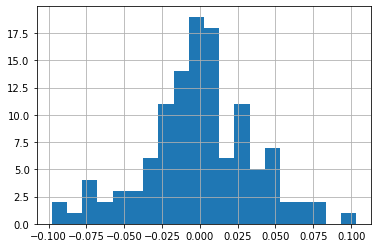

In [23]:
train['ds'].hist(bins=20) # looks quite similar to the normal distribution

### Attempt4: Rolling Mean 

In [26]:
rmean = train['ds'].rolling(12).mean()

In [27]:
fc4 = [rmean.iloc[-1]] * 24
fc4[:3]

[-0.00930152618072035, -0.00930152618072035, -0.00930152618072035]

### Attempt 5: FB Prophet 

Check the documentation

# More Sophisticated Univariate Forecasting (ie Non-Naive) 

Classics ( see the Hyndman FPP book ):
* Exponential Smoothing
* ARIMA 

* Kalman Filter (predict shock events)
* Fourier Transform (Feature eng, converts amplitude TS -> frequencies; used in predictive maintenance)

# More Sophisticated Multivariate Forecasting (ie Non-Naive) 

* Multiple Linear Regression (LR with extra features)
* LSTMs (speech processing. everything else has a strong tendency to overfit)
* Hidden Markov Models (HMMs, outputs are states, not scalars
* ARIMAX (X is for extra info)